# Convolutional Neural Network (CNN) Tutorial

A typical CNN model looks like this:

- Input layer
- Convolution layer + Activation function
- Pooling layer
- Fully Connected Layer

<img src="img/ex11.png">

Input layer
- As the name says, it’s our input image and can be Grayscale or RGB. Every image is made up of pixels that range from 0 to 255. We need to normalize them i.e convert the range between 0 to 1  before passing it to the model.

Convolution Layer
- The convolution layer is the layer where the filter is applied to our input image to extract or detect its features. A filter is applied to the image multiple times and creates a feature map which helps in classifying the input image.Many such feature maps are generated in practical applications. The filter is shifted by one column and this jump to the next column or row is known as stride.Once we get the feature map, an activation function is applied to it for introducing nonlinearity. A point to note here is that the Feature map we get is smaller than the size of our image. As we increase the value of stride the size of the feature map decreases.

Pooling Layer
- The pooling layer is applied after the Convolutional layer and is used to reduce the dimensions of the feature map which helps in preserving the important information or features of the input image and reduces the computation time. The most common types of Pooling are Max Pooling and Average Pooling. 

Fully Connected Layer
- Till now we have performed the Feature Extraction steps, now comes the Classification part. The Fully connected layer (as we have in ANN) is used for classifying the input image into a label. This layer connects the information extracted from the previous steps (i.e Convolution layer and Pooling layers) to the output layer and eventually classifies the input into the desired label.

## Digit Recognizer

In [4]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import os

warnings.filterwarnings('ignore')
print(os.listdir('input/'))

['test.csv', 'train.csv', 'sample_submission.csv']


## Loading the Data Set

In [5]:
train = pd.read_csv("input/train.csv")
print(train.shape)
train.head()

(42000, 785)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
test= pd.read_csv("input/test.csv")
print(test.shape)
test.head()

(28000, 784)


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
Y_train = train["label"]
X_train = train.drop(labels = ["label"], axis = 1) 

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

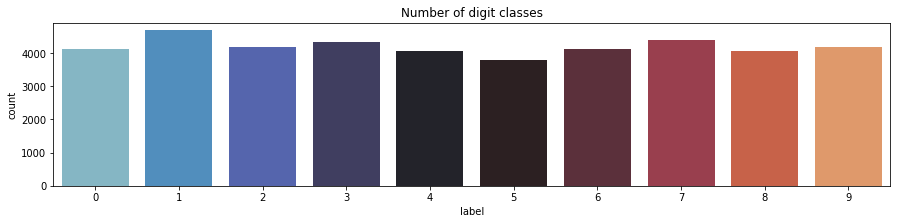

In [14]:
plt.figure(figsize=(15,3))
plt.title("Number of digit classes")
g = sns.countplot(Y_train, palette="icefire")
Y_train.value_counts()

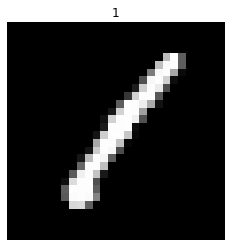

In [16]:
# plot some samples
img = X_train.iloc[0].to_numpy()
img = img.reshape((28,28))
plt.imshow(img,cmap='gray')
plt.title(train.iloc[0,0])
plt.axis("off")
plt.show()

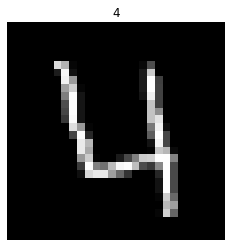

In [17]:
# plot some samples
img = X_train.iloc[3].to_numpy()
img = img.reshape((28,28))
plt.imshow(img,cmap='gray')
plt.title(train.iloc[3,0])
plt.axis("off")
plt.show()

## Normalization, Reshape and Label Encoding

- Normalization
    - We perform a grayscale normalization to reduce the effect of illumination's differences.
    - If we perform normalization, CNN works faster.
- Reshape
    - Train and test images (28 x 28)
    - We reshape all data to 28x28x1 3D matrices.
    - Keras needs an extra dimension in the end which correspond to channels. Our images are gray scaled so it use only one channel.
- Label Encoding
    - Encode labels to one hot vectors
        - 2 => [0,0,1,0,0,0,0,0,0,0]
        - 4 => [0,0,0,0,1,0,0,0,0,0]

In [18]:
# Normalize the data
X_train = X_train / 255.0
test = test / 255.0
print("x_train shape: ",X_train.shape)
print("test shape: ",test.shape)

x_train shape:  (42000, 784)
test shape:  (28000, 784)


In [19]:
# Reshape
X_train = X_train.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)
print("x_train shape: ",X_train.shape)
print("test shape: ",test.shape)

x_train shape:  (42000, 28, 28, 1)
test shape:  (28000, 28, 28, 1)


In [20]:
# Label Encoding 
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
Y_train = to_categorical(Y_train, num_classes = 10)

### Train Test Split

In [21]:
# Split the train and the validation set for the fitting
from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.1, random_state=2)
print("x_train shape",X_train.shape)
print("x_test shape",X_val.shape)
print("y_train shape",Y_train.shape)
print("y_test shape",Y_val.shape)

x_train shape (37800, 28, 28, 1)
x_test shape (4200, 28, 28, 1)
y_train shape (37800, 10)
y_test shape (4200, 10)


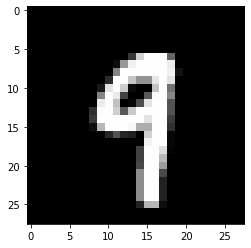

In [22]:
# Some examples
plt.imshow(X_train[2][:,:,0],cmap='gray')
plt.show()

## Implementing with Keras

In [24]:
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import RMSprop, Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

In [25]:
model = Sequential()
model.add(Conv2D(filters = 8, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters = 16, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))


# Define the optimizer
optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999)

# Compile the model
model.compile(optimizer = optimizer ,loss = "categorical_crossentropy", metrics=["accuracy"])

2023-06-13 16:09:44.165458: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [26]:
epochs = 10  # for better result increase the epochs
batch_size = 250

### Data Augmentation
- To avoid overfitting problem, we need to expand artificially our handwritten digit dataset
- Alter the training data with small transformations to reproduce the variations of digit.
- For example, the number is not centered The scale is not the same (some who write with big/small numbers) The image is rotated.

<img src="img/ex10.png">

In [27]:
# data augmentation
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # dimesion reduction
        rotation_range=5,  # randomly rotate images in the range 5 degrees
        zoom_range = 0.1, # Randomly zoom image 10%
        width_shift_range=0.1,  # randomly shift images horizontally 10%
        height_shift_range=0.1,  # randomly shift images vertically 10%
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images

datagen.fit(X_train)

## Fit the model

In [28]:
# Fit the model
history = model.fit_generator(datagen.flow(X_train,Y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (X_val,Y_val), steps_per_epoch=X_train.shape[0] // batch_size)

Epoch 1/10
151/151 [==============================] - 28s 179ms/step - loss: 1.1503 - accuracy: 0.6130 - val_loss: 0.2197 - val_accuracy: 0.9426
Epoch 2/10
151/151 [==============================] - 30s 198ms/step - loss: 0.4456 - accuracy: 0.8562 - val_loss: 0.1263 - val_accuracy: 0.9650
Epoch 3/10
151/151 [==============================] - 26s 171ms/step - loss: 0.3188 - accuracy: 0.9001 - val_loss: 0.0992 - val_accuracy: 0.9719
Epoch 4/10
151/151 [==============================] - 29s 189ms/step - loss: 0.2660 - accuracy: 0.9169 - val_loss: 0.0829 - val_accuracy: 0.9760
Epoch 5/10
151/151 [==============================] - 51s 334ms/step - loss: 0.2370 - accuracy: 0.9275 - val_loss: 0.0753 - val_accuracy: 0.9769
Epoch 6/10
151/151 [==============================] - 26s 174ms/step - loss: 0.2136 - accuracy: 0.9339 - val_loss: 0.0706 - val_accuracy: 0.9764
Epoch 7/10
151/151 [==============================] - 25s 164ms/step - loss: 0.1956 - accuracy: 0.9390 - val_loss: 0.0659 - val_ac

## Evaluate the model

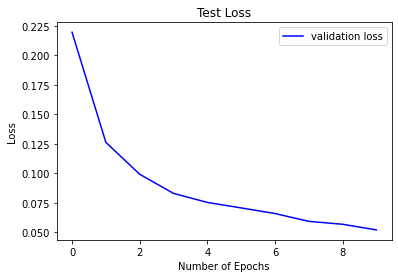

In [29]:
# Plot the loss and accuracy curves for training and validation 
plt.plot(history.history['val_loss'], color='b', label="validation loss")
plt.title("Test Loss")
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

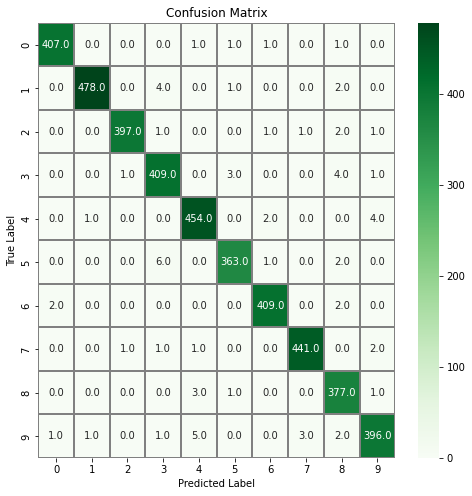

In [31]:
Y_pred = model.predict(X_val)
Y_pred_classes = np.argmax(Y_pred, axis = 1) 
Y_true = np.argmax(Y_val,axis = 1) 
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 

f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()